In [4]:
import os
cwd = os.getcwd()
print(cwd)

/Users/sandeepgautam/Desktop


In [5]:
import pandas as pd
import numpy as np


In [6]:
df=pd.read_csv('/Users/sandeepgautam/Desktop/train (2).csv')
df=df.replace('?',np.nan)
df.head()
df['Age']=pd.to_numeric(df['Age'])
df['myocardial']=pd.to_numeric(df['myocardial'])
df['Potassium']=pd.to_numeric(df['Potassium'])
df['Sodium']=pd.to_numeric(df['Sodium'])
df['AlAT']=pd.to_numeric(df['AlAT'])
df['AsAT']=pd.to_numeric(df['AsAT'])
df['WBC']=pd.to_numeric(df['WBC'])
df['ESR']=pd.to_numeric(df['ESR'])
df['Time']=pd.to_numeric(df['Time'])




In [7]:
df.Age.replace(999,np.nan,inplace=True)

### Solving null value problem of Age column with the help of Gender   Columns 


In [8]:
df.groupby('Gender').median()

,Age,myocardial,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome
Gender,,,,,,,,,,
Female,68.0,0.0,4.0,136.0,0.38,0.22,8.1,14.0,4.0,0
Male,59.0,0.0,4.2,136.0,0.38,0.22,8.1,8.0,4.0,0


In [9]:
df['Age']=df.groupby("Gender")['Age'].transform(lambda x: x.fillna(x.median()))

In [10]:
df[df.Age==999]

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Heredity,Hypertension,Symptomatic hypertension,Duration,...,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome


*  To check how many rows have different number of nan. value in total columns


In [11]:

for i in range(22):
    print("For columns"+str(i))
    print(df[df.isnull().sum(axis=1) >i].shape[0])

For columns0
1267
For columns1
1051
For columns2
978
For columns3
604
For columns4
453
For columns5
236
For columns6
160
For columns7
74
For columns8
53
For columns9
23
For columns10
17
For columns11
4
For columns12
1
For columns13
1
For columns14
0
For columns15
0
For columns16
0
For columns17
0
For columns18
0
For columns19
0
For columns20
0
For columns21
0


### We choose threshold of 6, so for those rows that have more than 6 null columns ,we remove the whole rows

In [12]:
a=df[df.isnull().sum(axis=1) >6].index

In [13]:
df=df.drop(df.index[a])


In [14]:
df.shape

(1115, 23)

In [15]:
df.isnull().sum().sum()

3629

In [16]:
df=df.drop('Heredity',axis=1)
df=df.drop('Systolic_emergency',axis=1)
df=df.drop('Diastolic_emergency',axis=1)

In [17]:
df.isnull().sum().sum()

1232

In [18]:
df.isnull().sum()

Age                           0
Gender                        0
myocardial                    0
Exertional angina            51
FC                           30
Heart Disease                25
Hypertension                  0
Symptomatic hypertension      0
Duration                    155
Arrhythmia                    4
Systolic_intensive_care     143
Diastolic_intensive_care    143
Potassium                   158
Sodium                      159
AlAT                         99
AsAT                        100
WBC                          24
ESR                          73
Time                         68
Outcome                       0
dtype: int64

In [19]:
df['myocardial']=pd.to_numeric(df['myocardial'])


In [20]:
df['Age']=pd.to_numeric(df['Age'])


In [21]:
df['Gender'].replace('Male',1,inplace=True)
df['Gender'].replace('Female',0,inplace=True)
df.head()


,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Hypertension,Symptomatic hypertension,Duration,Arrhythmia,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome
0,75.0,0,0.0,Two years ago,II FC,Exertional angina,Stage 2,No,NaN,No,140,90,NaN,NaN,0.30,0.18,7.8,16.0,7.0,0
1,50.0,1,1.0,Two years ago,II FC,Unstable angina,Stage 2,No,One year,No,NaN,NaN,3.9,132.0,0.23,0.52,6.2,20.0,7.0,0
4,76.0,0,3.0,Never,No angina,Unstable angina,Stage 2,No,More than 10 years,No,110,70,NaN,NaN,0.15,0.26,4.0,5.0,7.0,0
5,54.0,1,0.0,Never,No angina,No angina,No,No,No hypertension,No,NaN,NaN,5.3,139.0,0.15,0.11,6.8,30.0,2.0,0
7,63.0,1,0.0,Never,No angina,No angina,No,No,No hypertension,No,110,70,4.4,141.0,1.96,0.86,7.7,3.0,8.0,0


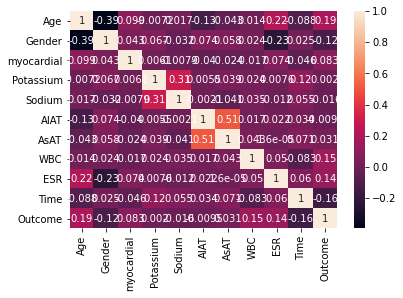

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn
correlation=df.select_dtypes(include='number')
corrMatrix=correlation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()



### Solving null value problem of Age column with the help of Gender Columns 


In [24]:
# 1st null value 
df['Age']=df.groupby("Gender")['Age'].transform(lambda x: x.fillna(x.median()))

In [25]:
df.Arrhythmia.value_counts()

No     1082
Yes      29
Name: Arrhythmia, dtype: int64

In [26]:
# When Arrhythmia is yes, make it 1 or else o
df['Arrhythmia']=np.where(df['Arrhythmia']=='Yes',1,0)

In [27]:
import seaborn as sns
sns.set_theme(style="whitegrid")


<AxesSubplot:xlabel='Arrhythmia', ylabel='Age'>

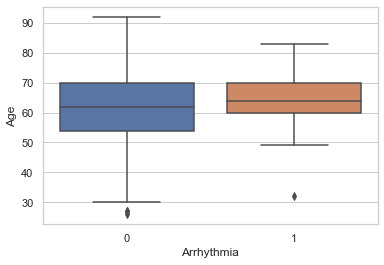

In [28]:
sns.boxplot(x="Arrhythmia", y="Age", data=df)

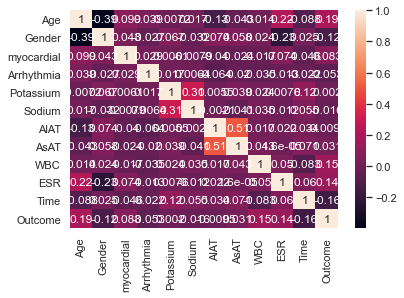

In [29]:
import seaborn as sn
correlation=df.select_dtypes(include='number')
corrMatrix=correlation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Solving null value problem of Arrhythmia column with the help of Gender and myocardial Columns 


In [30]:
df['Arrhythmia']=df.groupby(['Gender','myocardial'])['Arrhythmia'].transform(lambda x: x.fillna(x.mean()))



In [31]:
df.groupby(['Exertional angina']).mean()

,Age,Gender,myocardial,Arrhythmia,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome
Exertional angina,,,,,,,,,,,,
During the last year,60.562500,0.635417,0.479167,0.010417,4.098718,135.884615,0.491071,0.251429,9.298925,12.459770,4.922222,0.135417
Four to five years ago,62.913580,0.604938,0.802469,0.061728,4.276812,136.811594,0.416184,0.240789,9.326582,16.013889,4.727273,0.197531
More than five years ago,65.857143,0.562500,0.986607,0.031250,4.192222,136.226519,0.435419,0.242857,8.635780,13.604762,4.728155,0.232143
Never,59.022075,0.684327,0.218543,0.006623,4.223134,136.783042,0.515181,0.282681,8.881655,12.793911,4.689977,0.094923
One year ago,62.897727,0.579545,0.829545,0.079545,4.164000,136.520000,0.438354,0.256329,8.608140,13.951220,4.567901,0.090909
Three years ago,61.586957,0.630435,0.695652,0.065217,4.205128,136.025641,0.425135,0.240811,7.865217,14.488889,4.857143,0.086957
Two years ago,61.210526,0.657895,0.657895,0.039474,4.191045,136.447761,0.474583,0.263611,9.201389,12.956522,3.875000,0.223684


### Changing Exertional angina columns into ordinal data where Never=6 and One year ago=1(Other values are in between)

In [32]:
df['Exertional angina'].replace('During the last year',0,inplace=True)
df['Exertional angina'].replace('One year ago',1,inplace=True)
df['Exertional angina'].replace('Two years ago',2,inplace=True)
df['Exertional angina'].replace('Three years ago',3,inplace=True)
df['Exertional angina'].replace('Four to five years ago',4,inplace=True)
df['Exertional angina'].replace('More than five years ago',5,inplace=True)
df['Exertional angina'].replace('More than five years ago',5,inplace=True)
df['Exertional angina'].replace('Never',6,inplace=True)




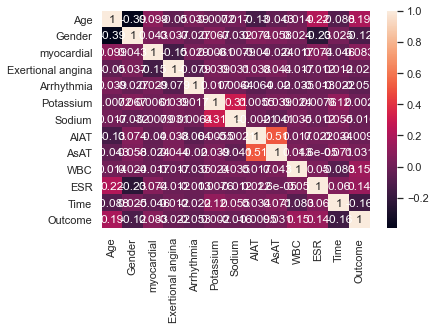

In [33]:
import seaborn as sn
correlation=df.select_dtypes(include='number')
corrMatrix=correlation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:xlabel='myocardial', ylabel='Exertional angina'>

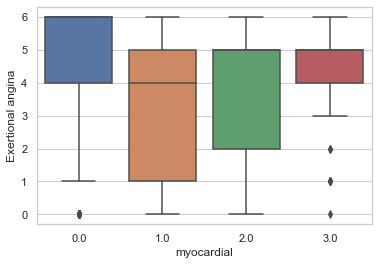

In [34]:
sns.boxplot(y="Exertional angina", x="myocardial", data=df)

### Solving null value problem of Exertional angina column with the help of myocardial  Column


In [35]:
# The median value of each group of myocardial will be used to put the values in Exertional angina's null value
df['Exertional angina']=df.groupby(['myocardial'])['Exertional angina'].transform(lambda x: x.fillna(x.median()))


In [36]:
df['Duration'].replace('One year',0,inplace=True)
df['Duration'].replace('Two years',1,inplace=True)
df['Duration'].replace('Three years',2,inplace=True)
df['Duration'].replace('Four years',3,inplace=True)
df['Duration'].replace('Five years',4,inplace=True)
df['Duration'].replace('Six to ten years',5,inplace=True)
df['Duration'].replace('More than 10 years',6,inplace=True)
df['Duration'].replace('No hypertension',7,inplace=True)

df.Duration.value_counts()

7.0    342
6.0    291
5.0    118
0.0     61
4.0     52
2.0     42
1.0     38
3.0     16
Name: Duration, dtype: int64

<AxesSubplot:xlabel='Hypertension', ylabel='Duration'>

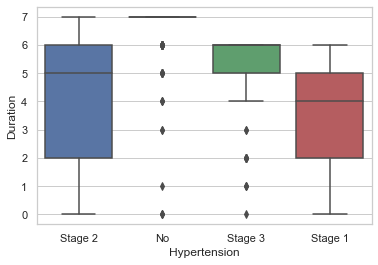

In [37]:
sns.boxplot(y="Duration", x="Hypertension", data=df)

* Because there seems to be relationship between Duration and Hupertensiom, we will use Hypertension to generate values for null values

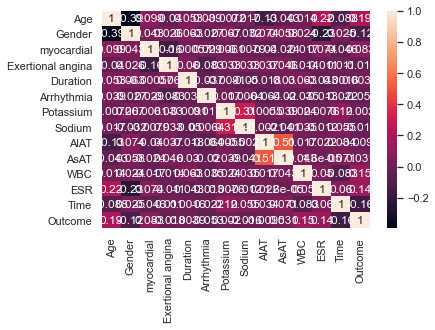

In [38]:
import seaborn as sn
correlation=df.select_dtypes(include='number')
corrMatrix=correlation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Solving null value problem of Duration column with the help of Hypertension  Columns 


In [39]:

# null convert
df['Duration']=df.groupby(['Hypertension'])['Duration'].transform(lambda x: x.fillna(x.median()))


In [40]:
df['Systolic_intensive_care']=pd.to_numeric(df['Systolic_intensive_care'])

In [41]:
df['Diastolic_intensive_care']=pd.to_numeric(df['Diastolic_intensive_care'])

In [42]:
df[df['Systolic_intensive_care'].isna()].head(50)
#df[df['var2'].isnull()]

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Hypertension,Symptomatic hypertension,Duration,Arrhythmia,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome
1,50.0,1,1.0,2.0,II FC,Unstable angina,Stage 2,No,0.0,0,NaN,NaN,3.9,132.0,0.23,0.52,6.2,20.0,7.0,0
5,54.0,1,0.0,6.0,No angina,No angina,No,No,7.0,0,NaN,NaN,5.3,139.0,0.15,0.11,6.8,30.0,2.0,0
11,49.0,1,1.0,3.0,II FC,Unstable angina,Stage 2,No,5.0,0,NaN,NaN,4.4,139.0,0.61,0.30,5.1,20.0,9.0,0
26,69.0,1,2.0,1.0,II FC,Unstable angina,Stage 2,No,0.0,0,NaN,NaN,4.5,141.0,0.61,0.41,7.5,48.0,9.0,0
56,65.0,1,2.0,0.0,II FC,Unstable angina,No,No,7.0,0,NaN,NaN,3.5,127.0,0.15,0.22,12.3,5.0,NaN,0
72,72.0,0,2.0,3.0,II FC,Exertional angina,Stage 2,No,2.0,0,NaN,NaN,3.6,130.0,1.20,0.15,4.8,NaN,3.0,0
76,74.0,0,0.0,5.0,II FC,Unstable angina,Stage 2,No,6.0,0,NaN,NaN,NaN,NaN,0.15,0.30,5.6,45.0,9.0,0
101,63.0,0,0.0,6.0,No angina,Unstable angina,Stage 2,No,2.0,0,NaN,NaN,4.6,140.0,0.30,0.15,8.8,4.0,3.0,0
102,62.0,1,0.0,6.0,No angina,No angina,Stage 2,No,5.0,0,NaN,NaN,3.1,132.0,0.23,0.15,13.1,4.0,7.0,0
109,71.0,0,2.0,2.0,II FC,Exertional angina,Stage 2,No,1.0,0,NaN,NaN,3.7,132.0,0.30,0.37,11.5,13.0,3.0,0


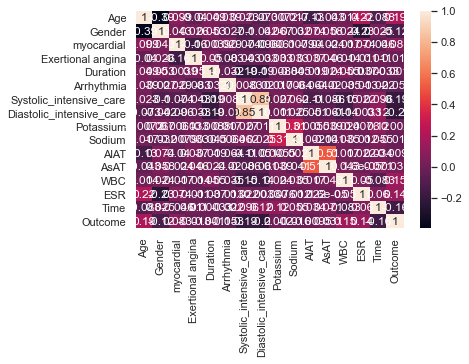

In [43]:
import seaborn as sn
correlation=df.select_dtypes(include='number')
corrMatrix=correlation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:xlabel='Hypertension', ylabel='Systolic_intensive_care'>

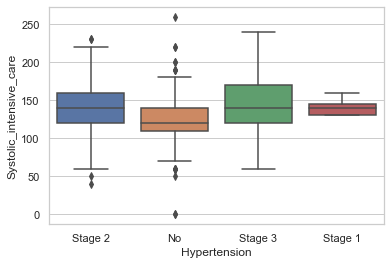

In [44]:
sns.boxplot(y="Systolic_intensive_care", x="Hypertension", data=df)

### Solving null value problem of Systolic_intensive_care column with the help of Hypertension  Columns 


In [45]:
# NULL soltution:Using Hypertension group to generate value for null for Systolic_intensive_care


df['Systolic_intensive_care']=df.groupby(['Hypertension'])['Systolic_intensive_care'].transform(lambda x: x.fillna(x.median()))


### Solving null value problem of Diastolic_intensive_care column with the help of Hypertension  Columns 


In [46]:
# Using same approach to find out Diastolic_intensive_care value from Systolic_intensive_care
df['Diastolic_intensive_care']=df.groupby(['Hypertension'])['Diastolic_intensive_care'].transform(lambda x: x.fillna(x.median()))




In [47]:
df['Potassium']=pd.to_numeric(df['Potassium'])
df['Sodium']=pd.to_numeric(df['Sodium'])
df['AlAT']=pd.to_numeric(df['AlAT'])
df['AsAT']=pd.to_numeric(df['AsAT'])
df['WBC']=pd.to_numeric(df['WBC'])
df['ESR']=pd.to_numeric(df['ESR'])
df['Time']=pd.to_numeric(df['Time'])

<AxesSubplot:xlabel='FC', ylabel='Potassium'>

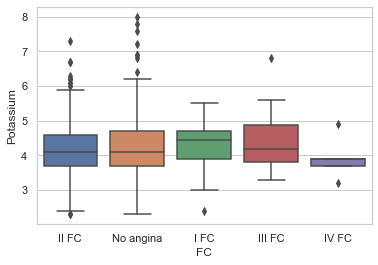

In [48]:

sns.boxplot(y="Potassium", x="FC", data=df)


### Solving null value problem of Heart Disease column with the help of Hypertension  Columns 


In [49]:
df['Heart Disease'] = df.groupby(['Hypertension'])['Heart Disease'].transform(lambda x: x.fillna(x.value_counts().index[0]))


### Solving null value problem of FC column with the help of Heart Disease  Columns 


In [50]:

df['FC'] = df.groupby(['Heart Disease'])['FC'].transform(lambda x: x.fillna(x.value_counts().index[0]))


In [51]:
# null solution of potassium

<AxesSubplot:xlabel='FC', ylabel='Potassium'>

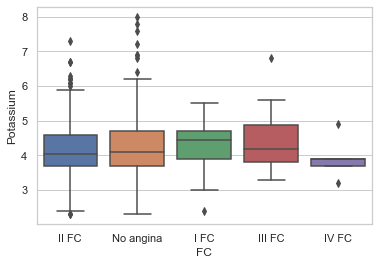

In [52]:
sns.boxplot(y="Potassium", x="FC", data=df)


### Solving null value problem of FC column with the help of Heart Disease  Columns 


In [53]:
df['Potassium']=df.groupby(['FC'])['Potassium'].transform(lambda x: x.fillna(x.median()))


<AxesSubplot:xlabel='Hypertension', ylabel='Sodium'>

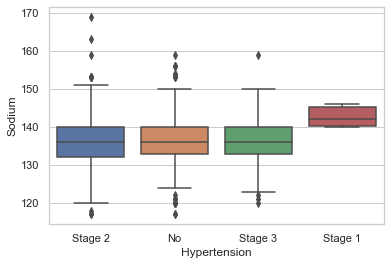

In [54]:
sns.boxplot(y="Sodium", x="Hypertension", data=df)


### Solving null value problem of Sodium  column with the help of Hypertension  Column


In [55]:

df['Sodium']=df.groupby(['Hypertension'])['Sodium'].transform(lambda x: x.fillna(x.median()))


In [56]:
# NULL solution for AlAT


<AxesSubplot:xlabel='Hypertension', ylabel='AlAT'>

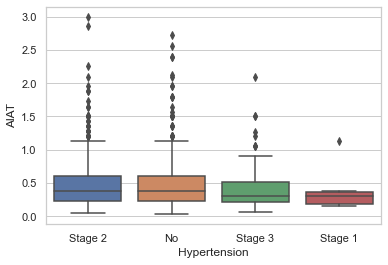

In [57]:
sns.boxplot(y="AlAT", x='Hypertension', data=df)


### Solving null value problem of AlAT  column with the help of Hypertension  Column


In [58]:
df['AlAT']=df.groupby(['Hypertension'])['AlAT'].transform(lambda x: x.fillna(x.median()))


<AxesSubplot:xlabel='FC', ylabel='AsAT'>

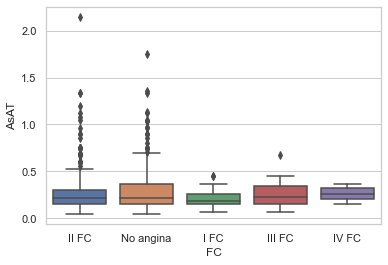

In [59]:
sns.boxplot(y="AsAT", x='FC', data=df)


### Solving null value problem of AsAT  column with the help of FC  Column


In [60]:
df['AsAT']=df.groupby(['FC'])['AsAT'].transform(lambda x: x.fillna(x.median()))


In [61]:
df.isna().sum()

Age                          0
Gender                       0
myocardial                   0
Exertional angina            0
FC                           0
Heart Disease                0
Hypertension                 0
Symptomatic hypertension     0
Duration                     0
Arrhythmia                   0
Systolic_intensive_care      0
Diastolic_intensive_care     0
Potassium                    0
Sodium                       0
AlAT                         0
AsAT                         0
WBC                         24
ESR                         73
Time                        68
Outcome                      0
dtype: int64

<AxesSubplot:xlabel='Exertional angina', ylabel='WBC'>

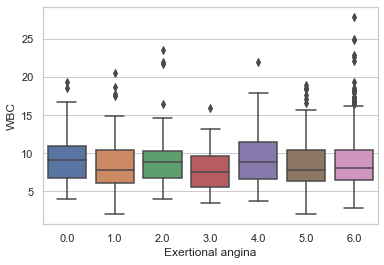

In [62]:
sns.boxplot(y="WBC", x='Exertional angina', data=df)


### Solving null value problem of WBC  column with the help of Exertional angina  Column


In [63]:
df['WBC']=df.groupby(['Exertional angina'])['WBC'].transform(lambda x: x.fillna(x.median()))


In [64]:
df.isna().sum()

Age                          0
Gender                       0
myocardial                   0
Exertional angina            0
FC                           0
Heart Disease                0
Hypertension                 0
Symptomatic hypertension     0
Duration                     0
Arrhythmia                   0
Systolic_intensive_care      0
Diastolic_intensive_care     0
Potassium                    0
Sodium                       0
AlAT                         0
AsAT                         0
WBC                          0
ESR                         73
Time                        68
Outcome                      0
dtype: int64

In [65]:
df.groupby(['Gender','myocardial'])['ESR'].mean()

Gender  myocardial
0       0.0           16.250996
        1.0           17.118280
        2.0           19.411765
        3.0           13.636364
1       0.0           10.764706
        1.0           11.654088
        2.0           15.122449
        3.0           13.864865
Name: ESR, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='ESR'>

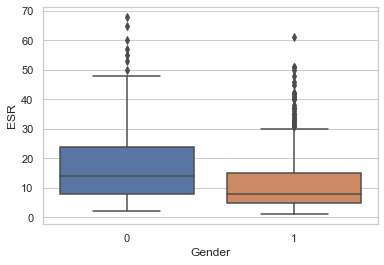

In [66]:
sns.boxplot(y="ESR", x='Gender', data=df)


<AxesSubplot:xlabel='myocardial', ylabel='ESR'>

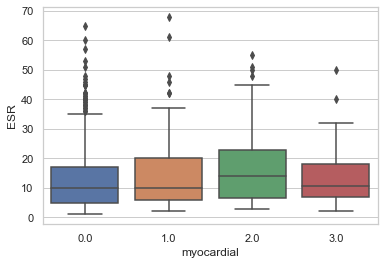

In [67]:
sns.boxplot(y="ESR", x='myocardial', data=df)


### Solving null value problem of ESR  column with the help of myocardial and Gender  Column


In [68]:
df['ESR']=df.groupby(['myocardial','Gender'])['ESR'].transform(lambda x: x.fillna(x.median()))


<AxesSubplot:xlabel='FC', ylabel='Time'>

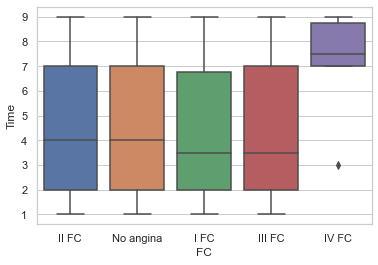

In [69]:
sns.boxplot(y="Time", x='FC', data=df)


<AxesSubplot:xlabel='Duration', ylabel='Time'>

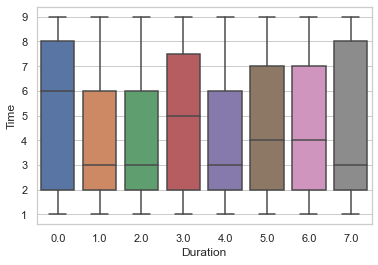

In [70]:
sns.boxplot(y="Time", x='Duration', data=df)


In [71]:
# FC hatauna parne huna sakcha

df.groupby(['Duration','FC'])['Time'].mean()

Duration  FC       
0.0       I FC         2.750000
          II FC        5.900000
          III FC       2.000000
          IV FC        7.000000
          No angina    5.343750
1.0       I FC         4.666667
          II FC        4.235294
          III FC       1.000000
          No angina    4.266667
2.0       I FC         2.000000
          II FC        4.750000
          III FC       4.500000
          No angina    3.315789
3.0       II FC        5.083333
          No angina    5.333333
4.0       I FC         1.000000
          II FC        4.590909
          No angina    3.321429
5.0       I FC         4.200000
          II FC        4.575758
          III FC       4.000000
          IV FC        8.000000
          No angina    5.234568
6.0       I FC         5.090909
          II FC        4.703297
          III FC       4.692308
          IV FC        7.000000
          No angina    4.604938
7.0       I FC         6.166667
          II FC        4.386207
          III FC    

### Solving null value problem of Time  column with the help of Duration and FC  Column


In [72]:
df['Time']=df.groupby(['Duration','FC'])['Time'].transform(lambda x: x.fillna(x.median()))
aa=df
c=aa

# Converting categorical data into one hot vector

In [73]:
columns= ['FC','Heart Disease','Hypertension','Symptomatic hypertension']    

In [74]:
import pandas as pd

for col in columns:
    one_hot=pd.get_dummies(c[col])
    one_hot = one_hot.add_prefix(col)
    c=c.drop(col,axis=1)
    c=c.join(one_hot)

c.head()

,Age,Gender,myocardial,Exertional angina,Duration,Arrhythmia,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,...,FCNo angina,Heart DiseaseExertional angina,Heart DiseaseNo angina,Heart DiseaseUnstable angina,HypertensionNo,HypertensionStage 1,HypertensionStage 2,HypertensionStage 3,Symptomatic hypertensionNo,Symptomatic hypertensionYes
0,75.0,0,0.0,2.0,5.0,0,140.0,90.0,4.05,136.0,...,0,1,0,0,0,0,1,0,1,0
1,50.0,1,1.0,2.0,0.0,0,140.0,90.0,3.90,132.0,...,0,0,0,1,0,0,1,0,1,0
4,76.0,0,3.0,6.0,6.0,0,110.0,70.0,4.10,136.0,...,1,0,0,1,0,0,1,0,1,0
5,54.0,1,0.0,6.0,7.0,0,120.0,80.0,5.30,139.0,...,1,0,1,0,1,0,0,0,1,0
7,63.0,1,0.0,6.0,7.0,0,110.0,70.0,4.40,141.0,...,1,0,1,0,1,0,0,0,1,0


In [75]:
168/947

0.17740232312565998

# Model building

In [76]:
#y_train=c['Outcome']
#x_train = c.drop('Outcome', axis=1)
y=c['Outcome']
x = c.drop('Outcome', axis=1)


In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(
   x, y, random_state = 0)

### KNN Classification

In [78]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#best implementation
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [5, 10, 15, 20, 30, 40, 50]}
knn_grid = GridSearchCV(knn, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc')
knn_grid.fit(x_train, y_train) #imbalance X_

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
             scoring='roc_auc')

In [79]:
knn_grid.best_params_

{'n_neighbors': 40}

In [80]:
knn_grid.best_score_

0.7268069892349185

In [81]:
roc_auc_score(y_train, knn_grid.predict(x_train)),roc_auc_score(y_test, knn_grid.predict(x_test))

NameError: name 'roc_auc_score' is not defined

In [ ]:
a=knn_grid.cv_results_
y=a['mean_test_score']
x=[5, 10, 15, 20, 30, 40, 50]
plt.plot(x,y)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [50,100,500,1000]}

logreg = LogisticRegression(random_state=0)
logreg_grid = GridSearchCV(logreg, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc')
logreg_grid.fit(x_train, y_train)

In [ ]:
logreg_grid.best_params_


In [ ]:
logreg_score = logreg_grid.best_score_
print(logreg_score)

In [ ]:
roc_auc_score(y_train, logreg_grid.predict(x_train)),roc_auc_score(y_test, logreg_grid.predict(x_test))

### Linear SVM


In [ ]:
from sklearn.svm import LinearSVC
from mlxtend.plotting import plot_decision_regions

linsvc = LinearSVC(random_state=0)

param_grid = {'C': [.001,.01,.1,1,10,100]}

linsvc_grid = GridSearchCV(lsvc, cv = 5, param_grid=param_grid, n_jobs = -1, scoring = 'roc_auc')
linsvc_grid.fit(x_train, y_train)

linsvc_score = lsvc_grid.best_score_
print(linsvc_score)

In [ ]:
linsvc_grid.best_params_


In [ ]:
roc_auc_score(y_train, linsvc_grid.predict(x_train)),roc_auc_score(y_test, linsvc_grid.predict(x_test))

In [ ]:
6

### Kernelized SVM - rbf

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': [.001,.01,.1,1,10,100], 'gamma': [.001,.01,.1,1,10,100]}

svcr = SVC(kernel='rbf', random_state=0)

svcr_grid = GridSearchCV(svcr, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc')

svcr_grid.fit(x_train, y_train)

rsvc_score = svcr_grid.best_score_
print(rsvc_score)

In [ ]:
svcr_grid.best_params_

In [ ]:
roc_auc_score(y_train, svcr_grid.predict(x_train)),roc_auc_score(y_test, svcr_grid.predict(x_test))

### Kernelized SVM - poly

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': [.1,1,10,20,100]}

svcp = SVC(kernel='poly', degree=3, random_state=0, coef0=1)

svcp_grid = GridSearchCV(svcp, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc')

svcp_grid.fit(x_train, y_train)

psvc_score = svcp_grid.best_score_
print(psvc_score)

In [ ]:
svcp_grid.best_params_


In [ ]:
roc_auc_score(y_train, svcp_grid.predict(x_train)),roc_auc_score(y_test, svcp_grid.predict(x_test))

### Kernelized SVM - linear

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': [.1,1,10,100]}

lsvc = SVC(kernel='linear', random_state=0)

lsvc_grid = GridSearchCV(lsvc, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc')

lsvc_grid.fit(x_train, y_train)

In [ ]:
lsvc_score = lsvc_grid.best_score_
print(lsvc_score)

In [ ]:
lsvc_grid.best_params_

In [ ]:
roc_auc_score(y_train, lsvc_grid.predict(x_train)),roc_auc_score(y_test, lsvc_grid.predict(x_test))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

midlst= [.001,.005,.01,.05,.1] # these numbers are relatively arbitrary
msllst= [30,60,120,240,480] # below a sample of size n=30 is not significant enough to justify its own leaf
msslst= [30,60,120,240,480] 
mdlst= [20,30,40,50,60,70] # too large of a tree will lose its interpretability, and therefore its business value. May consider further trimming.

param_grid = {'min_impurity_decrease': midlst, 'min_samples_leaf': msllst, 'min_samples_split': msslst, 'max_depth': mdlst}

tree = DecisionTreeClassifier(random_state=0)
tree_grid = GridSearchCV(tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

tree_grid.fit(x_train,y_train)

In [ ]:
dtree_score = tree_grid.best_score_
print(dtree_score)

In [ ]:
tree = DecisionTreeClassifier(**tree_grid.best_params_,random_state=0)
tree.fit(x_train,y_train)

In [ ]:
tree.score(x_train,y_train)

In [ ]:
roc_auc_score(y_train, tree_grid.predict(x_train)),roc_auc_score(y_test, tree_grid.predict(x_test))

# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

knn_clf = KNeighborsClassifier(**knn_grid.best_params_)
knn_clf.fit(x_train,y_train)

log_clf = LogisticRegression(**logreg_grid.best_params_,random_state=0)
log_clf.fit(x_train,y_train)

linsvc = LinearSVC(**linsvc_grid.best_params_,random_state=0)
linsvc.fit(x_train,y_train)

svcr = SVC(**svcr_grid.best_params_,kernel='rbf', random_state=0)
svcr.fit(x_train,y_train)

svcp = SVC(**svcp_grid.best_params_,kernel='poly')
svcp.fit(x_train,y_train)

lsvc = SVC(**lsvc_grid.best_params_,kernel='linear', random_state=0)
lsvc.fit(x_train,y_train)

tree = DecisionTreeClassifier(**tree_grid.best_params_,random_state=0)
tree.fit(x_train,y_train)

In [ ]:

from sklearn.metrics import roc_auc_score


voting_clf = VotingClassifier(estimators=[('linsvc',linsvc),('log_clf', log_clf), ('knn_clf', knn_clf),('lsvc',lsvc),('svcr', svcr),('svcp',svcp),
                                          ('tree',tree)], voting='hard')
voting_clf.fit(x_train, y_train)

score1=[]
from sklearn.metrics import accuracy_score
for clf in (linsvc,log_clf, knn_clf, lsvc,svcr, svcp,tree,voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))
    score1.append(roc_auc_score(y_test, y_pred))


# Bagging on LogisticRegression

In [ ]:
from sklearn.ensemble import BaggingClassifier

log_clf = LogisticRegression(**logreg_grid.best_params_,random_state=0)
log_clf.fit(x_train,y_train)

bag_clf = BaggingClassifier(log_clf, random_state=0,n_jobs=-1)

param_grid = {'max_samples': [0.01,0.05,0.1,0.5,1],

              'max_features': [0.01,0.05,0.1,0.5,1]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(bag_clf, param_grid, cv=5,scoring = 'roc_auc')

grid_search.fit(x_train,y_train)

grid_search.best_score_


In [ ]:
roc_auc_score(y_train, grid_search.predict(x_train)),roc_auc_score(y_test, grid_search.predict(x_test))

## Bagging classifier on SVC kenel='rbf




In [ ]:
from sklearn.ensemble import BaggingClassifier

svcr = SVC(**svcr_grid.best_params_,kernel='rbf', random_state=0)
svcr.fit(x_train,y_train)

bag_clf = BaggingClassifier(svcr, random_state=0,n_jobs=-1)

param_grid = {'max_samples': [0.01,0.05,0.1,0.5,1],

              'max_features': [0.01,0.05,0.1,0.5,1]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(bag_clf, param_grid, cv=5,scoring = 'roc_auc')

grid_search.fit(x_train,y_train)

grid_search.best_score_


In [ ]:
roc_auc_score(y_train, grid_search.predict(x_train)),roc_auc_score(y_test, grid_search.predict(x_test))

In [ ]:
9

In [ ]:
8

## Pasting  on LogisticRegression

In [ ]:
from sklearn.ensemble import BaggingClassifier

log_clf = LogisticRegression(**logreg_grid.best_params_,random_state=0)
log_clf.fit(x_train,y_train)


bag_clf = BaggingClassifier(log_clf, random_state=0,bootstrap=False, n_jobs=-1)


param_grid = {'max_samples': [0.01,0.05,0.1,0.5,1],

              'max_features': [0.01,0.05,0.1,0.5,1]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(bag_clf, param_grid, cv=5,scoring = 'roc_auc')

grid_search.fit(x_train,y_train)
grid_search.best_score_


In [ ]:

roc_auc_score(y_train, grid_search.predict(x_train)),roc_auc_score(y_test, grid_search.predict(x_test))

# Pasting on SVC kernel='rbf'

In [ ]:
from sklearn.ensemble import BaggingClassifier

svcr = SVC(**svcr_grid.best_params_,kernel='rbf', random_state=0)
svcr.fit(x_train,y_train)


bag_clf = BaggingClassifier(svcr, random_state=0,bootstrap=False, n_jobs=-1)


param_grid = {'max_samples': [0.01,0.05,0.1,0.5,1],

              'max_features': [0.01,0.05,0.1,0.5,1]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(bag_clf, param_grid, cv=5,scoring = 'roc_auc')

grid_search.fit(x_train,y_train)
grid_search.best_score_


In [ ]:
roc_auc_score(y_train, grid_search.predict(x_train)),roc_auc_score(y_test, grid_search.predict(x_test))

In [ ]:
8

## Adaboast on Logistic Regression

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(LogisticRegression(**logreg_grid.best_params_,random_state=0), n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf.fit(x_train, y_train)

AdaboastlinearSVC=roc_auc_score(y_train, ada_clf.predict(x_train))
roc_auc_score(y_train, ada_clf.predict(x_train)),roc_auc_score(y_test, ada_clf.predict(x_test))

## Adaboast on SVC-kernel-'rbf'

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(SVC(**svcr_grid.best_params_,kernel='rbf', random_state=0), n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf.fit(x_train, y_train)

AdaboastlinearSVC=roc_auc_score(y_train, ada_clf.predict(x_train))
roc_auc_score(y_train, ada_clf.predict(x_train)),roc_auc_score(y_test, ada_clf.predict(x_test))

# Gradient Bosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)

Gradient_Bosting=roc_auc_score(y_train, gbrt.predict(x_train))
roc_auc_score(y_train, gbrt.predict(x_train)),roc_auc_score(y_test, gbrt.predict(x_test))

# Checking if deep learning performs better than Adaboosting

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
seed = 10
np.random.seed(10)

In [ ]:
x_train.shape

In [ ]:
# create model
model = Sequential()
model.add(Dense(2, input_dim=29, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

In [ ]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(2, input_dim=29, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [ ]:
grid_search_result = grid_search.fit(x_train, y_train)

In [ ]:
grid_search.score(x_train, y_train)

In [ ]:
grid_search.score(x_test, y_test)

In [ ]:
roc_auc_score(y_train, gbrt.predict(x_train)),roc_auc_score(y_test, gbrt.predict(x_test))

## Out of all the models we implemented AdaBoostClassifier on LogisticRegression is the best

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(LogisticRegression(**logreg_grid.best_params_,random_state=0), n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf.fit(x_train, y_train)

AdaboastlinearSVC=roc_auc_score(y_train, ada_clf.predict(x_train))
roc_auc_score(y_train, ada_clf.predict(x_train)),roc_auc_score(y_test, ada_clf.predict(x_test))

* It not only have relatively high ROC_AUC score but the Train and test scores are also consistent with one another

### Now it's check if scaling the data gives us the better result or not


In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
pca = PCA(n_components=0.95)
scaler=MinMaxScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [ ]:
ada_clf = AdaBoostClassifier(LogisticRegression(**logreg_grid.best_params_,random_state=0), n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf.fit(x_train_scale, y_train)

AdaboastlinearSVC=roc_auc_score(y_train, ada_clf.predict(x_train_scale))
roc_auc_score(y_train, ada_clf.predict(x_train_scale)),roc_auc_score(y_test, ada_clf.predict(x_test_scale))

* Seems like we are better off without scalling the data

# Evaluation Data

* X_Test data is preprocessed and used to predict y_pred


In [ ]:
# Evaluation Data


df=pd.read_csv('/Users/sandeepgautam/Desktop/test (2).csv')
df=df.replace('?',np.nan)
df.head()
df['Output']=1000
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df['Age']=pd.to_numeric(df['Age'])
df['myocardial']=pd.to_numeric(df['myocardial'])
df['Potassium']=pd.to_numeric(df['Potassium'])
df['Sodium']=pd.to_numeric(df['Sodium'])
df['AlAT']=pd.to_numeric(df['AlAT'])
df['AsAT']=pd.to_numeric(df['AsAT'])
df['WBC']=pd.to_numeric(df['WBC'])
df['ESR']=pd.to_numeric(df['ESR'])
df['Time']=pd.to_numeric(df['Time'])


### Solving null value problem of Age column with the help of Gender   Columns 


In [ ]:
df.Age.replace(999,np.nan,inplace=True)
df['Age']=df.groupby("Gender")['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
df=df.drop('Heredity',axis=1)
df=df.drop('Systolic_emergency',axis=1)
df=df.drop('Diastolic_emergency',axis=1)

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df['myocardial']=pd.to_numeric(df['myocardial'])


In [ ]:
df['Age']=pd.to_numeric(df['Age'])


In [ ]:
df['Gender'].replace('Male',1,inplace=True)
df['Gender'].replace('Female',0,inplace=True)
df.head()

In [ ]:
import seaborn as sn
correlation=df.select_dtypes(include='number')
corrMatrix=correlation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# When Arrhythmia is yes, make it 1 or else o
df['Arrhythmia']=np.where(df['Arrhythmia']=='Yes',1,0)

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
sns.boxplot(x="Arrhythmia", y="Age", data=df)

In [ ]:
import seaborn as sn
correlation=df.select_dtypes(include='number')
corrMatrix=correlation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Solving null value problem of ESR  column with the help of myocardial and Gender  Column


In [ ]:
sns.boxplot(y="myocardial", x="Arrhythmia", data=df)

In [ ]:
df[df.myocardial.isna()]

In [ ]:
df.describe()
df.shape

### Creating New column temp which is temp age range columns just to see if there is some relationship between age and different group

In [ ]:
a=[]
for i in df['Age']:
    if i<=40:
        a.append('Young')
    elif i>=60:
        a.append('Old')
    else:
        a.append('Mid_age')
df['temp']=a
df.head()

In [ ]:
sns.boxplot(y="myocardial", x="temp", data=df)

In [ ]:
### Solving null value problem of Arrhythmia column with the help of Gender and myocardial Columns 
df.groupby('Arrhythmia').median()

### Changing Exertional angina columns into ordinal data where Never=6 and One year ago=1(Other values are in between)

In [ ]:
df['myocardial']=df.groupby("Arrhythmia")['myocardial'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df['Exertional angina'].replace('During the last year',0,inplace=True)
df['Exertional angina'].replace('One year ago',1,inplace=True)
df['Exertional angina'].replace('Two years ago',2,inplace=True)
df['Exertional angina'].replace('Three years ago',3,inplace=True)
df['Exertional angina'].replace('Four to five years ago',4,inplace=True)
df['Exertional angina'].replace('More than five years ago',5,inplace=True)
df['Exertional angina'].replace('More than five years ago',5,inplace=True)
df['Exertional angina'].replace('Never',6,inplace=True)




In [ ]:
df.groupby(['myocardial']).mean()


### Solving null value problem of myocardial column with the help of Arrhythmia   Columns 


In [ ]:
df['Exertional angina']=df.groupby(['myocardial'])['Exertional angina'].transform(lambda x: x.fillna(x.median()))


In [ ]:
df.isna().sum()

In [ ]:
#df[df['Hypertension'].isna()]

#sns.boxplot(y="temp", x="Hypertension", data=df)

df['Hypertension']


In [ ]:
df[df['Hypertension'].isna()]

In [ ]:
df['Hypertension'].value_counts()

In [ ]:
a=[]
for i in df['Hypertension']:
    if i=='Stage 2':
        a.append(2)
    elif i=='Stage 3':
        a.append(3)
    elif i=='Stage 1':
        a.append(1)
    else:
        a.append(0)
df['HYPER']=a
df.head()

In [ ]:
sns.boxplot(y="HYPER", x="temp", data=df)

In [ ]:
df['HYPER']=df.groupby(['temp'])['HYPER'].transform(lambda x: x.fillna(x.median()))


In [ ]:
df['Hypertension'].value_counts()

In [ ]:
a=[]
for i in df['HYPER']:
    if i==2:
        a.append('Stage 2')
    elif i==3:
        a.append('Stage 3')
    elif i==1:
        a.append('Stage 1')
    else:
        a.append('No')
df['HYPER']=a


In [ ]:
df['Hypertension']=df['HYPER']

In [ ]:
df['Hypertension'].isna().sum()

In [ ]:
#df.groupby('temp').agg(lambda x:x.value_counts().index[0])


  ### SOlving null value problem of Symptomatic hypertension by simply replacing the most reppeted value

In [ ]:
df['Symptomatic hypertension'].fillna('No',inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df['Duration'].replace('One year',0,inplace=True)
df['Duration'].replace('Two years',1,inplace=True)
df['Duration'].replace('Three years',2,inplace=True)
df['Duration'].replace('Four years',3,inplace=True)
df['Duration'].replace('Five years',4,inplace=True)
df['Duration'].replace('Six to ten years',5,inplace=True)
df['Duration'].replace('More than 10 years',6,inplace=True)
df['Duration'].replace('No hypertension',7,inplace=True)

df.Duration.value_counts()

In [ ]:
sns.boxplot(y="Duration", x="Hypertension", data=df)

### Solving null value problem of Duration column with the help of Hypertension  Columns 


In [ ]:
df['Duration']=df.groupby(['Hypertension'])['Duration'].transform(lambda x: x.fillna(x.median()))


In [ ]:
df['Systolic_intensive_care']=pd.to_numeric(df['Systolic_intensive_care'])
sns.boxplot(y="Systolic_intensive_care", x="Hypertension", data=df)

### Solving null value problem of Systolic_intensive_care column with the help of Hypertension  Columns 


In [ ]:
df['Systolic_intensive_care']=df.groupby(['Hypertension'])['Systolic_intensive_care'].transform(lambda x: x.fillna(x.median()))


### Solving null value problem of Diastolic_intensive_care column with the help of Hypertension  Columns 


In [ ]:
df['Diastolic_intensive_care']=df.groupby(['Hypertension'])['Diastolic_intensive_care'].transform(lambda x: x.fillna(x.median()))


In [ ]:
df.isna().sum()

### Solving null value problem of Heart Disease column with the help of Hypertension  Columns 


In [ ]:
df['Heart Disease'] = df.groupby(['Hypertension'])['Heart Disease'].transform(lambda x: x.fillna(x.value_counts().index[0]))


### Solving null value problem of FC column with the help of Heart Disease  Columns 


In [ ]:
df['FC'] = df.groupby(['Heart Disease'])['FC'].transform(lambda x: x.fillna(x.value_counts().index[0]))


In [ ]:
sns.boxplot(y="Potassium", x="FC", data=df)


### Solving null value problem of FC column with the help of Heart Disease  Columns 


In [ ]:
df['Potassium']=df.groupby(['FC'])['Potassium'].transform(lambda x: x.fillna(x.median()))


In [ ]:
sns.boxplot(y="Sodium", x="Hypertension", data=df)


### Solving null value problem of Sodium  column with the help of Hypertension  Column


In [ ]:
df['Sodium']=df.groupby(['Hypertension'])['Sodium'].transform(lambda x: x.fillna(x.median()))


In [ ]:
sns.boxplot(y="AlAT", x='Hypertension', data=df)


In [ ]:
### Solving null value problem of AlAT  column with the help of Hypertension  Column


In [ ]:
df['AlAT']=df.groupby(['Hypertension'])['AlAT'].transform(lambda x: x.fillna(x.median()))


In [ ]:
sns.boxplot(y="AsAT", x='FC', data=df)


### Solving null value problem of AsAT  column with the help of FC  Column


In [ ]:
df['AsAT']=df.groupby(['FC'])['AsAT'].transform(lambda x: x.fillna(x.median()))


In [ ]:
sns.boxplot(y="WBC", x='Exertional angina', data=df)


### Solving null value problem of WBC  column with the help of Exertional angina  Column


In [ ]:
df['WBC']=df.groupby(['Exertional angina'])['WBC'].transform(lambda x: x.fillna(x.median()))


In [ ]:
sns.boxplot(y="ESR", x='Gender', data=df)


In [ ]:
sns.boxplot(y="ESR", x='myocardial', data=df)


### Solving null value problem of ESR  column with the help of myocardial and Gender  Column


In [ ]:
df['ESR']=df.groupby(['myocardial','Gender'])['ESR'].transform(lambda x: x.fillna(x.median()))


In [ ]:
sns.boxplot(y="Time", x='FC', data=df)


In [ ]:
sns.boxplot(y="Time", x='Duration', data=df)


### Solving null value problem of Time  column with the help of Duration Column


In [ ]:
df['Time']=df.groupby(['Duration'])['Time'].transform(lambda x: x.fillna(x.median()))
aa=df
c=aa

### Removing variables that we created for temporary purpose

In [ ]:
c=c.drop(['Output','temp','HYPER'],axis=1)

In [ ]:
columns= ['FC','Heart Disease','Hypertension','Symptomatic hypertension']

for col in columns:
    one_hot=pd.get_dummies(c[col])
    one_hot = one_hot.add_prefix(col)
    c=c.drop(col,axis=1)
    c=c.join(one_hot)

c.head()


In [ ]:
x_test=c

In [ ]:
x_test.shape

In [ ]:
x_test.isna().sum()

In [ ]:
ada_clf.predict(x_test)

In [ ]:
pd.DataFrame(ada_clf.predict(x_test)).value_counts()

In [ ]:
y_train.value_counts()